## Exploring your own dataset

I will be exploring the 2023 NFL play by play data to analyze which teams preformed better/worse in certain categories    
* Data source: https://nflsavant.com/about.php    
* Click "Download the 2023 play by play data"

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('pbp-2023.csv', header=0)

In [120]:
#remove columns which are ALL NA values
df = df.dropna(how = 'all')

#exclude plays if a penalty was accepted, since that play gain/loss does not count
df = df.drop(df[df['IsPenaltyAccepted'] == 1].index)
df.head()

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,...,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
0,2023110504,2023-11-05,2,3,15,LA,GB,2,2,63,...,0,0,CENTER,37,OPP,0,NaN,0,NaN,0
1,2023110504,2023-11-05,2,0,5,GB,LA,2,4,70,...,0,0,NaN,30,OPP,0,NaN,0,NaN,0
2,2023110504,2023-11-05,2,0,4,GB,LA,3,4,70,...,0,0,NaN,30,OPP,0,NaN,0,NaN,0
3,2023110504,2023-11-05,2,0,0,GB,LA,0,0,100,...,0,0,NaN,0,OPP,0,NaN,0,NaN,0
4,2023110504,2023-11-05,3,2,13,GB,LA,4,6,92,...,0,0,NaN,8,OPP,0,NaN,0,NaN,0


In [121]:
#there's a few variables of interest here. 
# some we want to sum (i.e. yards, some we want to see the most frequent value (i.e. playtype)
vars_to_sum = ['OffenseTeam','Yards', 'IsIncomplete', 'IsTouchdown', 'IsSack', 'IsInterception', 'IsFumble', 'IsTwoPointConversion', 'IsTwoPointConversionSuccessful']
vars_to_get_most_frequent = ['Formation', 'PlayType','PassType','RushDirection']
all_relevant_vars = vars_to_sum + vars_to_get_most_frequent

In [122]:
## stats for total season
total_season_stats = df

#narrow focus to variables of interest
total_season_stats = total_season_stats[all_relevant_vars]

#group by offensive team
total_season_stats = total_season_stats.groupby(['OffenseTeam']).sum()

In [123]:
#use mode to get most frequent result
most_freq = df.groupby('OffenseTeam').agg(pd.Series.mode)

In [124]:
#overwrite the vars_to_get_most_frequent with most_freq data
total_season_stats[vars_to_get_most_frequent] = most_freq[vars_to_get_most_frequent]

total_season_stats.head()

,Yards,IsIncomplete,IsTouchdown,IsSack,IsInterception,IsFumble,IsTwoPointConversion,IsTwoPointConversionSuccessful,Formation,PlayType,PassType,RushDirection
OffenseTeam,,,,,,,,,,,,
ARI,5636,187,41,42,13,22,12,3,SHOTGUN,PASS,SHORT LEFT,CENTER
ATL,5872,180,33,40,16,23,4,2,SHOTGUN,PASS,SHORT RIGHT,LEFT END
BAL,6322,155,55,41,7,24,2,2,SHOTGUN,PASS,SHORT RIGHT,CENTER
BUF,6379,173,52,24,18,16,3,2,SHOTGUN,PASS,SHORT RIGHT,CENTER
CAR,4640,222,25,66,9,21,3,3,SHOTGUN,PASS,SHORT RIGHT,CENTER


In [125]:
#clean up the column names
renaming = {'Yards': 'Total Yards', 
            'IsIncomplete': 'Incomplete Passes', 
            'IsTouchdown': 'Touchdowns', 
            'IsSack': 'Sacks Against', 
            'IsInterception': 'Interceptions Against', 
            'IsFumble': 'Offensive Fumbles', 
            'IsTwoPointConversion': 'Two Point Conversion Attempts', 
            'IsTwoPointConversionSuccessful': 'Successful Two Point Conversions',
            'Formation': "Most Common Formation",
            'PlayType': "Most Common PlayType",
            'PassType': "Most Common PassType",
            'RushDirection': "Most Common RushDirection"}
total_season_stats = total_season_stats.rename(renaming, axis=1)
total_season_stats

,Total Yards,Incomplete Passes,Touchdowns,Sacks Against,Interceptions Against,Offensive Fumbles,Two Point Conversion Attempts,Successful Two Point Conversions,Most Common Formation,Most Common PlayType,Most Common PassType,Most Common RushDirection
OffenseTeam,,,,,,,,,,,,
ARI,5636,187,41,42,13,22,12,3,SHOTGUN,PASS,SHORT LEFT,CENTER
ATL,5872,180,33,40,16,23,4,2,SHOTGUN,PASS,SHORT RIGHT,LEFT END
BAL,6322,155,55,41,7,24,2,2,SHOTGUN,PASS,SHORT RIGHT,CENTER
BUF,6379,173,52,24,18,16,3,2,SHOTGUN,PASS,SHORT RIGHT,CENTER
CAR,4640,222,25,66,9,21,3,3,SHOTGUN,PASS,SHORT RIGHT,CENTER
CHI,5480,175,40,51,15,23,4,1,SHOTGUN,PASS,SHORT RIGHT,LEFT END
CIN,5563,179,40,51,14,11,2,2,SHOTGUN,PASS,SHORT LEFT,CENTER
CLE,6023,240,44,45,25,25,9,6,UNDER CENTER,PASS,SHORT RIGHT,RIGHT GUARD
DAL,6384,177,52,40,10,12,5,5,UNDER CENTER,PASS,SHORT RIGHT,CENTER


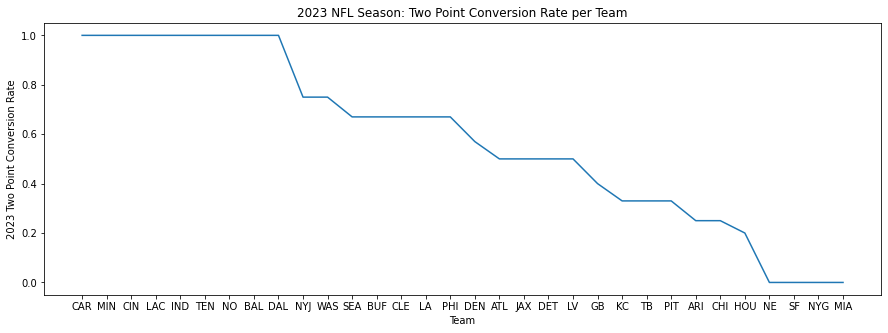

In [200]:
### TO DO: build an app where you can select which variable you want to rank off of

## who had the best 2 point conversion rate?
total_season_stats['Two Point Conversion Rate'] = round(total_season_stats['Successful Two Point Conversions']/total_season_stats['Two Point Conversion Attempts'],2).fillna(0)

# add the rate next two the two point conversion columns to read easier
column_to_move = total_season_stats.pop('Two Point Conversion Rate')
total_season_stats.insert(8, 'Two Point Conversion Rate', column_to_move)

#sort low to high for figure
total_season_stats = total_season_stats.sort_values(by=['Two Point Conversion Rate'], ascending=False)

plt.figure(figsize=(15,5))
df = total_season_stats.sort_values('Two Point Conversion Rate', ascending=False)
plt.plot(total_season_stats['Two Point Conversion Rate'])
plt.xlabel("Team")
plt.ylabel("2023 Two Point Conversion Rate")
plt.title("2023 NFL Season: Two Point Conversion Rate per Team")
plt.show()

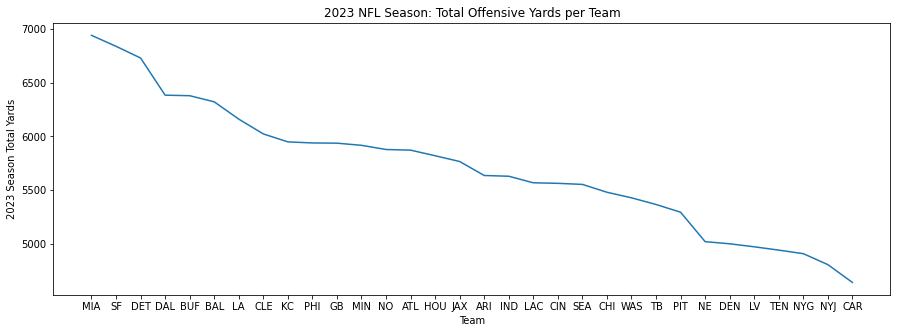

In [199]:
## who had the most yards

#sort low to high for figure
total_season_stats = total_season_stats.sort_values(by=['Total Yards'], ascending=False)

plt.figure(figsize=(15,5))
plt.plot(total_season_stats['Total Yards'])
plt.xlabel("Team")
plt.ylabel("2023 Season Total Yards")
plt.title("2023 NFL Season: Total Offensive Yards per Team")
plt.show()

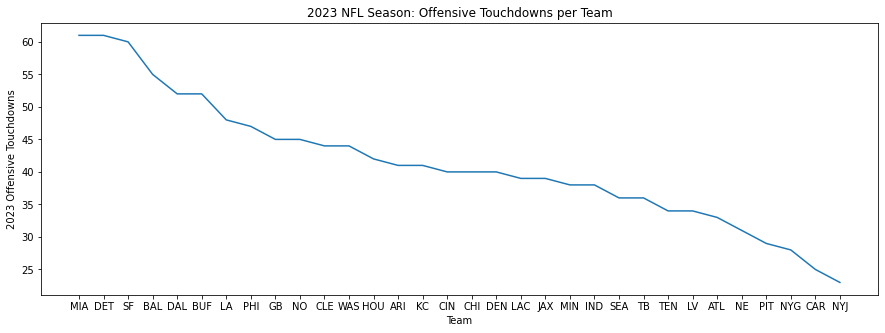

In [198]:
## who had the most touchdowns

#sort low to high for figure
total_season_stats = total_season_stats.sort_values(by=['Touchdowns'], ascending=False)

plt.figure(figsize=(15,5))
plt.plot(total_season_stats['Touchdowns'])
plt.xlabel("Team")
plt.ylabel("2023 Offensive Touchdowns")
plt.title("2023 NFL Season: Offensive Touchdowns per Team")

plt.show()

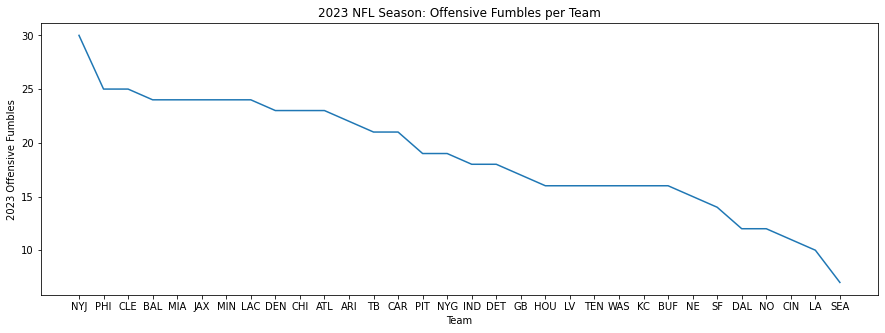

In [197]:
## who had the most fumbles

#sort low to high for figure
total_season_stats = total_season_stats.sort_values(by=['Offensive Fumbles'], ascending=False)

plt.figure(figsize=(15,5))
plt.plot(total_season_stats['Offensive Fumbles'])
plt.xlabel("Team")
plt.ylabel("2023 Offensive Fumbles")
plt.title("2023 NFL Season: Offensive Fumbles per Team")
plt.show()

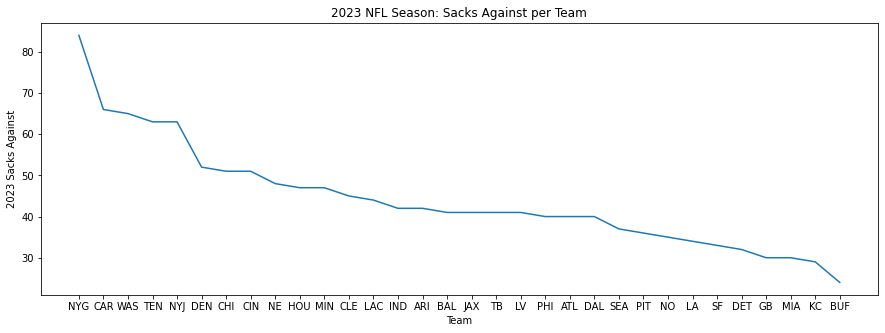

In [203]:
## who had the most sacks against their offense

#sort low to high for figure
total_season_stats = total_season_stats.sort_values(by=['Sacks Against'], ascending=False)

plt.figure(figsize=(15,5))
plt.plot(total_season_stats['Sacks Against'])
plt.xlabel("Team")
plt.ylabel("2023 Sacks Against")
plt.title("2023 NFL Season: Sacks Against per Team")
plt.show()

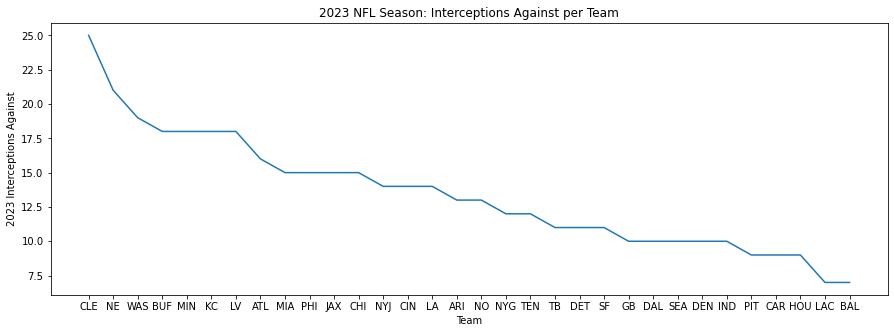

In [209]:
## who had the most interceptions

#sort low to high for figure
total_season_stats = total_season_stats.sort_values(by=['Interceptions Against'], ascending=False)

plt.figure(figsize=(15,5))
plt.plot(total_season_stats['Interceptions Against'])
plt.xlabel("Team")
plt.ylabel("2023 Interceptions Against")
plt.title("2023 NFL Season: Interceptions Against per Team")
plt.show()